In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Open and read the .hea file
with open("/kaggle/input/the-circor-digiscope-phonocardiogram-dataset-v2/training_data/training_data/13918_AV.hea", "r") as f:
    content = f.read()

# Print the contents of the .hea file
print(content)


13918_AV 1 4000 41152
13918_AV.wav 16+44 1 16 0 0 0 0 AV



In [3]:
import os
import pandas as pd

In [4]:
# Open up csv table with info
data_csv = '/kaggle/input/the-circor-digiscope-phonocardiogram-dataset-v2/training_data.csv'
df = pd.read_csv(data_csv)


In [5]:
df.head()

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


In [6]:
# Delete not usefull columns
df = df.drop(columns=['Age', 'Sex', 'Height', 'Weight', 'Pregnancy status', 'Most audible location', 'Systolic murmur pitch', 'Systolic murmur quality', 'Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality', 'Campaign', 'Additional ID', 'Systolic murmur grading', 'Systolic murmur shape', 'Systolic murmur timing'])

In [7]:
df.shape

(942, 4)

In [8]:
os.mkdir('/kaggle/working/training_data')
ofilepathi = r'/kaggle/working/training_data' 

In [9]:
# For each patient make unique row for each recording location, add digit to end of patient ID corresponding to recording location
new_df = pd.DataFrame(columns=['Patient ID', 'Label', 'Recording location', 'filepath', 'ofilepath'])
for index, row in df.iterrows():
  try:
    recording_locations = row['Locations'].split('+')
  except:
    print("no recording location")
  patient_id = row['Patient ID']
  murmur = row['Murmur']

  # Turning Nan data cells into variable of empty list
  if type(row['Murmur locations']) != float:
    murmur_locations = row['Murmur locations'].split('+')
  else:
    murmur_locations = list()

  # Iterate over recording locations and add new row
  for recording_loc in recording_locations:
      # Get filepath
      filepath = '/kaggle/input/the-circor-digiscope-phonocardiogram-dataset-v2/training_data/training_data/' + str(patient_id) + "_" + recording_loc + '.wav'
      ofilepath = ofilepathi+ '/' + str(patient_id) + "_" + recording_loc + '.wav'
      # Go through and get number  corresponding to location: {"AV" : 1, "PV" : 2, "TV" : 3, "MV" : 4, "Phc(any location) : 5"}
      if recording_loc == 'AV':
        integer_add = 1
      elif recording_loc == 'PV':
        integer_add = 2
      elif recording_loc == 'TV':
        integer_add = 3
      elif recording_loc == 'MV':
        integer_add = 4
      else:
        integer_add = 5

      # Checking if recording location had murmur
      if recording_loc in murmur_locations:      
        new_row = {'Patient ID' : patient_id, 'Label' : 1, 'Recording location' : integer_add, 'filepath' : filepath, 'ofilepath' : ofilepath}
#         new_df = new_df.append(new_row, ignore_index = True)
        new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
      else:
        # Check to see if murmur is unkown or absent
        if murmur == "Unknown":
          new_row = {'Patient ID' : patient_id, 'Label' : 0, 'Recording location' : integer_add, 'filepath' : filepath, 'ofilepath' : ofilepath}
#           new_df = new_df.append(new_row, ignore_index = True)
          new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)
        

        else:
          new_row = {'Patient ID' : patient_id, 'Label' : 0, 'Recording location' : integer_add, 'filepath' : filepath, 'ofilepath' : ofilepath}
#           new_df = new_df.append(new_row, ignore_index = True)
          new_df = pd.concat([new_df, pd.DataFrame([new_row])], ignore_index=True)


In [10]:
new_df


,Patient ID,Label,Recording location,filepath,ofilepath
0,2530,0,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_AV.wav
1,2530,0,2,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_PV.wav
2,2530,0,3,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_TV.wav
3,2530,0,4,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_MV.wav
4,9979,1,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/9979_AV.wav
...,...,...,...,...,...
3158,85345,0,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85345_AV.wav
3159,85345,0,2,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85345_PV.wav
3160,85349,0,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85349_AV.wav
3161,85349,0,2,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85349_PV.wav


In [11]:
# Labels: {0: Not there/unknown, 1 : there}, {0 : 'Absent', 1 : 'AV', 2 : 'PV', 3 : 'TV',
# 4 : 'MV', 0 : 'unknown'}
new_df_1 = new_df.drop(columns=['Recording location'])
new_df_1.head(300)

,Patient ID,Label,filepath,ofilepath
0,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_AV.wav
1,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_PV.wav
2,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_TV.wav
3,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_MV.wav
4,9979,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/9979_AV.wav
...,...,...,...,...
295,49952,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/49952_TV.wav
296,49952,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/49952_MV.wav
297,49952,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/49952_MV.wav
298,49959,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/49959_AV.wav


In [12]:
# Delete duplicates
new_df_1 = new_df_1.drop_duplicates()

In [13]:
new_df_1

,Patient ID,Label,filepath,ofilepath
0,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_AV.wav
1,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_PV.wav
2,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_TV.wav
3,2530,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/2530_MV.wav
4,9979,1,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/9979_AV.wav
...,...,...,...,...
3158,85345,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85345_AV.wav
3159,85345,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85345_PV.wav
3160,85349,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85349_AV.wav
3161,85349,0,/kaggle/input/the-circor-digiscope-phonocardio...,/kaggle/working/training_data/85349_PV.wav


In [14]:
%%capture
from os.path import exists
from pydub import AudioSegment

for index, row in new_df.iterrows():
  try:
    filepath = row['filepath']
    ofilepath = row['ofilepath']
    # Check if file path exists
    if exists(filepath):
      # Get TSV file
      tsv_filepath = filepath.replace('.wav', '.tsv')
      tsv = pd.read_csv(tsv_filepath, sep='\t', names=['start', 'end', 'label'])

      # Go through rows and cut .wav file to only 10 annotated segments
      # Define ten_time to increase every time there is a beggining of a heart beat(i.e. label==1)
      ten_time = 0
      no_start = True
      for tsv_index, tsv_row in tsv.iterrows():
        # First 1 to start clip
        if tsv_row['label'] == 1 and no_start == True:
          start = tsv_row['start']
          ten_time+=1
          no_start = False
          continue
        # Update ten_time without assigning start to new later number
        elif tsv_row['label'] == 1:
          ten_time+=1
          continue
        # Annotated heart cycle repeated at least 10 times and label 4 was detected
        elif tsv_row['label'] == 4 and ten_time >= 10:
          end = tsv_row['end']
          break
        # Making sure last 4 annotation is up to date incase there are less than 10 cycles
        elif tsv_row['label'] == 4:
          end = tsv_row['end']
          continue

      # Either loop broke by hitting label 4 after 10 cycles or the loop just ended because there were under 10 4s
      start = start*1000
      end = end*1000

      # Get wav file and cut output not annotated part
      wav_file = AudioSegment.from_file(filepath)

      new_wav_file = wav_file[start:end]
      #print(filepath)
      new_wav_file.export(ofilepath, format='wav')
    else:
      # Audio has two files, have to do cropping for both
      filepath_mults = [filepath.split(".wav")[0] + "_1.wav", filepath.split(".wav")[0] + "_2.wav"]
      for filepath in filepath_mults:
        # Get TSV file
        tsv_filepath = filepath.replace('.wav', '.tsv')

        tsv = pd.read_csv(tsv_filepath, sep='\t', names=['start', 'end', 'label'])

        # Go through rows and cut .wav file to only 10 annotated segments
        # Define ten_time to increase every time there is a beggining of a heart beat(i.e. label==1)
        ten_time = 0
        no_start = True
        for tsv_index, tsv_row in tsv.iterrows():
          # First 1 to start clip
          if tsv_row['label'] == 1 and no_start == True:
            start = tsv_row['start']
            ten_time+=1
            no_start = False
            continue
          # Update ten_time without assigning start to new later number
          elif tsv_row['label'] == 1:
            ten_time+=1
            continue
          # Annotated heart cycle repeated at least 10 times and label 4 was detected
          elif tsv_row['label'] == 4 and ten_time >= 10:
            end = tsv_row['end']
            break
          # Making sure last 4 annotation is up to date incase there are less than 10 cycles
          elif tsv_row['label'] == 4:
            end = tsv_row['end']
            continue

        # Either loop broke by hitting label 4 after 10 cycles or the loop just ended because there were under 10 4s
        start = start*1000
        end = end*1000

        print(filepath)
        print(start)
        print(end)
        # Get wav file and cut output not annotated part
        wav_file = AudioSegment.from_file(filepath)

        new_wav_file = wav_file[start:end]
        print(len(new_wav_file))
        new_wav_file.export(ofilepath, format='wav')
  except Exception as e:
    print("Except", e)
    continue

  #break


In [15]:
import os

# Specify the path to the folder containing .wav files
folder_path = '/kaggle/working/training_data'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Count the number of .wav files
wav_files = [file for file in files if file.endswith('.wav')]
num_wav_files = len(wav_files)

print("Number of .wav files:", num_wav_files)
#print("List of .wav files:", wav_files)


Number of .wav files: 3140


In [16]:
for index, row in new_df_1.iterrows():
  filepath = row['ofilepath']
  if not exists(filepath):
        new_df_1 = new_df_1.drop(index)
        print(index)
        continue
  if exists(filepath):
      wav_file = AudioSegment.from_file(filepath)
      if len(wav_file) == 0:
        new_df_1 = new_df.drop(index)
        print(row)
  else:
    # Audio has two files, have to do cropping for both
    filepath_mults = [filepath.split(".wav")[0] + "_1.wav", filepath.split(".wav")[0] + "_2.wav"]
    for filepath in filepath_mults:
      wav_file = AudioSegment.from_file(filepath)
      if len(wav_file) == 0:
        new_df_1 = new_df_1.drop(index)
        print(row)


1260


In [17]:
new_df_1['filepath'][0]

'/kaggle/input/the-circor-digiscope-phonocardiogram-dataset-v2/training_data/training_data/2530_AV.wav'

In [18]:
new_df_1['ofilepath'][0]

'/kaggle/working/training_data/2530_AV.wav'

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchaudio
import sys

import librosa

from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import IPython.display as ipd

from tqdm import tqdm

In [20]:
# Split dataframe into train and val
from sklearn.model_selection import train_test_split

train, valid = train_test_split(new_df_1, test_size=0.2)
train, test = train_test_split(train, test_size=0.1)

In [34]:
len(train)

2260

In [22]:
len(valid)

628

In [23]:
len(test)

252

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [25]:
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [27]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
#n_fft = 2048, n_mels = 128, fmax=8300, max_sound_time = 18
# def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
#   try:
#     wav,sr = librosa.load(file_path,sr=sr)
#   except:
#     # Combine two files
#     print("except")
#     combine_sound(file_path)
#     wav,sr = librosa.load(file_path,sr=sr)
#   if wav.shape[0]<18*sr:
#     wav=np.pad(wav,int(np.ceil((18*sr-wav.shape[0])/2)),mode='reflect')
#   else:
#     wav=wav[:18*sr]
#   spec=librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft,
#               hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
#   spec_db=librosa.power_to_db(spec,top_db=top_db)
#   #librosa.display.specshow(spec_db,sr=sr, x_axis='linear')
#   #plt.show()
#   return spec_db
def new_get_melspectrogram_db(file_path,n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
  try:
    wav,sr = librosa.load(file_path)
  except:
    # Combine two files
    print("except")
    combine_sound(file_path)
    #wav,sr = librosa.load(file_path,sr=sr)
    wav, sr = librosa.load(file_path)
  if wav.shape[0]<18*sr:
    wav=np.pad(wav,int(np.ceil((18*sr-wav.shape[0])/2)),mode='reflect')
  else:
    wav=wav[:18*sr]
  spec=librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft,hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
  spec_db=librosa.power_to_db(spec,top_db=top_db)
  #librosa.display.specshow(spec_db,sr=sr, x_axis='linear')
  #plt.show()
  return spec_db

In [28]:
class HeartMurmurData(Dataset):
  def __init__(self, df, in_col, out_col):
    self.df = df
    self.data = []
    self.labels = []
    self.c2i={}
    self.i2c={}
    self.categories = sorted(df[out_col].unique())
    for i, category in enumerate(self.categories):
      self.c2i[category]=i
      self.i2c[i]=category
    for ind in tqdm(range(len(df))):
      row = df.iloc[ind]
      file_path = row[in_col]
      self.data.append(spec_to_image(new_get_melspectrogram_db(file_path))[np.newaxis,...])
      self.labels.append(self.c2i[row['Label']])
  def __len__(self):
    return len(self.data)
  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [32]:
train_data = HeartMurmurData(train, 'ofilepath', 'Label')
valid_data = HeartMurmurData(valid, 'ofilepath', 'Label')

100%|██████████| 628/628 [00:30<00:00, 20.88it/s]


In [41]:
train['ofilepath'][504]

'/kaggle/working/training_data/50099_PV.wav'

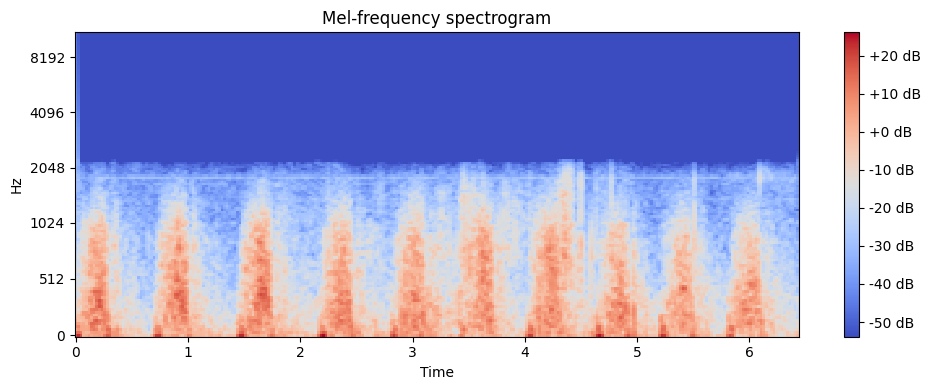

In [42]:
sr=None
n_fft=2048
hop_length=512
n_mels=128
fmin=20
fmax=8300
top_db=80
# Load an audio file
audio_path = train['ofilepath'][504]
y, sr = librosa.load(audio_path)

# Compute mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=n_fft,hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
#spec=librosa.feature.melspectrogram(train['ofilepath'][0], sr=sr, n_fft=n_fft,
              #hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
S_dB=librosa.power_to_db(S,top_db=top_db)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


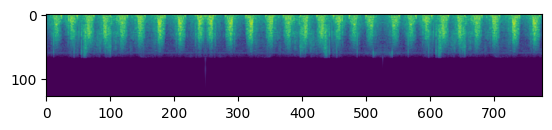

(128, 776)


In [43]:
QC=spec_to_image(new_get_melspectrogram_db(train['ofilepath'][504]))
plt.imshow(QC)
plt.show()
print(QC.shape)

In [44]:
from torchvision.models import resnet152, mobilenet_v3_small
import torch
import torch.nn as nn
import torch.optim as optim
if torch.cuda.is_available():
  device=torch.device('cuda:0')
else:
  device=torch.device('cpu')
resnet_model = mobilenet_v3_small(pretrained=True)
resnet_model.fc = nn.Linear(2048,2)
resnet_model.conv1 = nn.Conv2d(1, 3, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)
resnet_model = resnet_model.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 81.7MB/s]


In [47]:
class CustomMobileNetV2(nn.Module):
    def __init__(self):
        super(CustomMobileNetV2, self).__init__()
        # Add a Conv2d layer to convert 1 channel to 3 channels
        self.conv1 = nn.Conv2d(1, 3, kernel_size=3, stride=1, padding=1)
        
        # Load the pretrained MobileNetV2 model (excluding the classifier)
        self.mobilenet = mobilenet_v3_small(pretrained=True)
        self.classifier = nn.Linear(1000,2)
        # Remove the classifier layer (fully connected layers)
        #self.mobilenet.classifier = nn.Identity()

    def forward(self, x):
        # Apply the Conv2d layer
        x = self.conv1(x)
        
        # Pass the output through the pretrained MobileNetV2 model
        x = self.mobilenet(x)
        x = self.classifier(x)
        return x

# Create an instance of the custom model
custom_mobilenet = CustomMobileNetV2()

In [48]:
!pip install torchsummary
from torchsummary import summary

In [49]:
summary(custom_mobilenet.to(device), (1, 128, 141))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 128, 141]              30
            Conv2d-2           [-1, 16, 64, 71]             432
       BatchNorm2d-3           [-1, 16, 64, 71]              32
         Hardswish-4           [-1, 16, 64, 71]               0
            Conv2d-5           [-1, 16, 32, 36]             144
       BatchNorm2d-6           [-1, 16, 32, 36]              32
              ReLU-7           [-1, 16, 32, 36]               0
 AdaptiveAvgPool2d-8             [-1, 16, 1, 1]               0
            Conv2d-9              [-1, 8, 1, 1]             136
             ReLU-10              [-1, 8, 1, 1]               0
           Conv2d-11             [-1, 16, 1, 1]             144
      Hardsigmoid-12             [-1, 16, 1, 1]               0
SqueezeExcitation-13           [-1, 16, 32, 36]               0
           Conv2d-14           [-1, 16,

In [50]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=8, shuffle=True)

In [51]:
for batch_idx, (data, target) in enumerate(train_loader):
    print(f"Batch {batch_idx+1}:")
    print("Data shape:", data.shape)
    print("Target shape:", target.shape)
    print("target: ",target)
    break

Batch 1:
Data shape: torch.Size([32, 1, 128, 776])
Target shape: torch.Size([32])
target:  tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0])


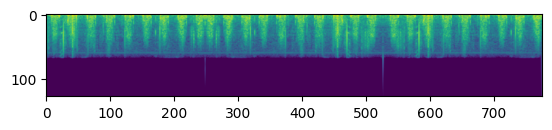

In [52]:
plt.imshow(data[0][0])

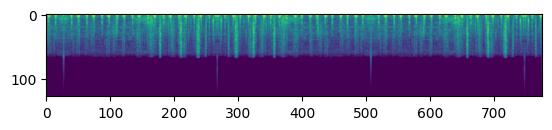

In [53]:
plt.imshow(data[25][0])

In [54]:
torch.cuda.empty_cache()

In [55]:
x, y=next(train_loader._get_iterator())
x.shape
y.shape

torch.Size([32])

In [56]:
custom_mobilenet(x.to(device, dtype=torch.float32))

tensor([[ 0.0371,  0.3791],
        [ 0.2796,  0.5199],
        [-0.7598,  1.9617],
        [ 1.8900,  1.7011],
        [ 1.7818,  1.1933],
        [-0.6985, -0.2565],
        [ 1.3357, -0.5739],
        [ 0.5687,  0.0816],
        [ 0.0825,  0.8378],
        [ 1.7382,  1.7980],
        [ 2.2483,  2.8927],
        [ 2.7134,  1.2829],
        [-0.4739,  0.8699],
        [ 1.5645,  0.9158],
        [ 2.0656,  1.7871],
        [-0.1123,  1.5842],
        [ 0.4482,  2.0188],
        [ 0.7167,  1.9730],
        [ 0.4114,  0.0693],
        [ 1.8966,  1.1526],
        [ 1.5095,  1.1443],
        [ 1.4006, -1.2453],
        [-0.2989, -0.7108],
        [ 1.1600,  0.8681],
        [ 2.0345,  1.3695],
        [ 2.3264,  0.3155],
        [ 2.0189,  1.5206],
        [-0.4308,  1.2570],
        [ 1.3939,  0.8212],
        [ 1.5732,  0.7881],
        [-0.0643, -0.8203],
        [ 1.2324, -1.9306]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
learning_rate = 2e-5
#optimizer = optim.Adam(resnet_model.parameters(), lr=learning_rate)
optimizer = optim.Adam(custom_mobilenet.parameters(), lr=learning_rate)
epochs = 100
loss_fn = nn.CrossEntropyLoss()
resnet_train_losses=[]
resnet_valid_losses=[]
def lr_decay(optimizer, epoch):
  if epoch%10==0:
    new_lr = learning_rate / (2**(epoch//10))
    optimizer.param_groups[0]['lr'] = new_lr
    #optimizer = setlr(optimizer, new_lr)
    print(f'Changed learning rate to {new_lr}')
  return optimizer
def train(model, loss_fn, train_loader, valid_loader, epochs, optimizer, train_losses, valid_losses, change_lr=None):
  for epoch in tqdm(range(1,epochs+1)):
    model.train()
    batch_losses=[]
    if change_lr:
      optimizer = change_lr(optimizer, epoch)
    for i, data in enumerate(train_loader):
      x, y = data
      optimizer.zero_grad()
      x = x.to(device, dtype=torch.float32)
      y = y.to(device, dtype=torch.long)
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      loss.backward()
      batch_losses.append(loss.item())
      optimizer.step()
    train_losses.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_losses[-1])}')
    model.eval()
    batch_losses=[]
    trace_y = []
    trace_yhat = []
    for i, data in enumerate(valid_loader):
      x, y = data
      x = x.to(device, dtype=torch.float32)
      y = y.to(device, dtype=torch.long)
      y_hat = model(x)
      loss = loss_fn(y_hat, y)
      trace_y.append(y.cpu().detach().numpy())
      trace_yhat.append(y_hat.cpu().detach().numpy())      
      batch_losses.append(loss.item())
    valid_losses.append(batch_losses)
    trace_y = np.concatenate(trace_y)
    trace_yhat = np.concatenate(trace_yhat)
    accuracy = np.mean(trace_yhat.argmax(axis=1)==trace_y)
    print(f'Epoch - {epoch} Valid-Loss : {np.mean(valid_losses[-1])} Valid-Accuracy : {accuracy}')
train(custom_mobilenet, loss_fn, train_loader, valid_loader, epochs, optimizer, resnet_train_losses, resnet_valid_losses, lr_decay)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch - 1 Train-Loss : 0.4379953076721917


  1%|          | 1/100 [00:05<08:18,  5.04s/it]

Epoch - 1 Valid-Loss : 0.3919793733313114 Valid-Accuracy : 0.8710191082802548
Epoch - 2 Train-Loss : 0.3327203649030605


  2%|▏         | 2/100 [00:09<08:08,  4.98s/it]

Epoch - 2 Valid-Loss : 0.37301815164428725 Valid-Accuracy : 0.8837579617834395
Epoch - 3 Train-Loss : 0.3038702818079734


  3%|▎         | 3/100 [00:14<08:01,  4.96s/it]

Epoch - 3 Valid-Loss : 0.35652930001857913 Valid-Accuracy : 0.8837579617834395
Epoch - 4 Train-Loss : 0.28598502582647434


  4%|▍         | 4/100 [00:19<07:54,  4.95s/it]

Epoch - 4 Valid-Loss : 0.3493642475503155 Valid-Accuracy : 0.8885350318471338
Epoch - 5 Train-Loss : 0.26410432369776177


  5%|▌         | 5/100 [00:24<07:49,  4.94s/it]

Epoch - 5 Valid-Loss : 0.344205490018748 Valid-Accuracy : 0.893312101910828
Epoch - 6 Train-Loss : 0.24232419254914137


  6%|▌         | 6/100 [00:29<07:46,  4.97s/it]

Epoch - 6 Valid-Loss : 0.3438346761314175 Valid-Accuracy : 0.8964968152866242
Epoch - 7 Train-Loss : 0.2294429555325441


  7%|▋         | 7/100 [00:34<07:41,  4.97s/it]

Epoch - 7 Valid-Loss : 0.3318276302535323 Valid-Accuracy : 0.8885350318471338
Epoch - 8 Train-Loss : 0.21452464341697558


  8%|▊         | 8/100 [00:39<07:36,  4.96s/it]

Epoch - 8 Valid-Loss : 0.3360292291669529 Valid-Accuracy : 0.8980891719745223
Epoch - 9 Train-Loss : 0.1919707363130341


  9%|▉         | 9/100 [00:44<07:30,  4.96s/it]

Epoch - 9 Valid-Loss : 0.33395709576014476 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 1e-05
Epoch - 10 Train-Loss : 0.18455487447725216


 10%|█         | 10/100 [00:49<07:25,  4.95s/it]

Epoch - 10 Valid-Loss : 0.3322125408043967 Valid-Accuracy : 0.9012738853503185
Epoch - 11 Train-Loss : 0.16561076449046672


 11%|█         | 11/100 [00:54<07:20,  4.95s/it]

Epoch - 11 Valid-Loss : 0.3311330742332377 Valid-Accuracy : 0.8964968152866242
Epoch - 12 Train-Loss : 0.16134174414713617


 12%|█▏        | 12/100 [00:59<07:15,  4.95s/it]

Epoch - 12 Valid-Loss : 0.33006302899197687 Valid-Accuracy : 0.8980891719745223
Epoch - 13 Train-Loss : 0.151458273156428


 13%|█▎        | 13/100 [01:04<07:11,  4.96s/it]

Epoch - 13 Valid-Loss : 0.33261463781700856 Valid-Accuracy : 0.9012738853503185
Epoch - 14 Train-Loss : 0.14930976559998285


 14%|█▍        | 14/100 [01:09<07:06,  4.96s/it]

Epoch - 14 Valid-Loss : 0.33172785320991205 Valid-Accuracy : 0.8964968152866242
Epoch - 15 Train-Loss : 0.14038867744761455


 15%|█▌        | 15/100 [01:14<07:00,  4.95s/it]

Epoch - 15 Valid-Loss : 0.33047338909929314 Valid-Accuracy : 0.8980891719745223
Epoch - 16 Train-Loss : 0.12954475783126454


 16%|█▌        | 16/100 [01:19<06:55,  4.95s/it]

Epoch - 16 Valid-Loss : 0.3437508712227963 Valid-Accuracy : 0.8996815286624203
Epoch - 17 Train-Loss : 0.11850725190425423


 17%|█▋        | 17/100 [01:24<06:50,  4.95s/it]

Epoch - 17 Valid-Loss : 0.3406895825144234 Valid-Accuracy : 0.8964968152866242
Epoch - 18 Train-Loss : 0.11887898589943496


 18%|█▊        | 18/100 [01:29<06:45,  4.95s/it]

Epoch - 18 Valid-Loss : 0.3471360465252324 Valid-Accuracy : 0.8980891719745223
Epoch - 19 Train-Loss : 0.1020457553086986


 19%|█▉        | 19/100 [01:34<06:41,  4.95s/it]

Epoch - 19 Valid-Loss : 0.3573196748436629 Valid-Accuracy : 0.893312101910828
Changed learning rate to 5e-06
Epoch - 20 Train-Loss : 0.09836934260289434


 20%|██        | 20/100 [01:39<06:36,  4.95s/it]

Epoch - 20 Valid-Loss : 0.3512101194620887 Valid-Accuracy : 0.8949044585987261
Epoch - 21 Train-Loss : 0.09587562632497768


 21%|██        | 21/100 [01:44<06:30,  4.94s/it]

Epoch - 21 Valid-Loss : 0.34797174027307504 Valid-Accuracy : 0.8980891719745223
Epoch - 22 Train-Loss : 0.09159480767245863


 22%|██▏       | 22/100 [01:48<06:25,  4.95s/it]

Epoch - 22 Valid-Loss : 0.3545441546041188 Valid-Accuracy : 0.8964968152866242
Epoch - 23 Train-Loss : 0.08732511150375219


 23%|██▎       | 23/100 [01:53<06:20,  4.95s/it]

Epoch - 23 Valid-Loss : 0.3638946322276245 Valid-Accuracy : 0.8901273885350318
Epoch - 24 Train-Loss : 0.08568373054895602


 24%|██▍       | 24/100 [01:58<06:18,  4.97s/it]

Epoch - 24 Valid-Loss : 0.36146113740964025 Valid-Accuracy : 0.893312101910828
Epoch - 25 Train-Loss : 0.08726749060229516


 25%|██▌       | 25/100 [02:04<06:17,  5.03s/it]

Epoch - 25 Valid-Loss : 0.3555644168223761 Valid-Accuracy : 0.89171974522293
Epoch - 26 Train-Loss : 0.07257667813502566


 26%|██▌       | 26/100 [02:09<06:10,  5.01s/it]

Epoch - 26 Valid-Loss : 0.3628537802002098 Valid-Accuracy : 0.89171974522293
Epoch - 27 Train-Loss : 0.0765396951055023


 27%|██▋       | 27/100 [02:14<06:05,  5.01s/it]

Epoch - 27 Valid-Loss : 0.35817663230096236 Valid-Accuracy : 0.8885350318471338
Epoch - 28 Train-Loss : 0.07484407027737355


 28%|██▊       | 28/100 [02:19<05:59,  4.99s/it]

Epoch - 28 Valid-Loss : 0.37913449202911764 Valid-Accuracy : 0.8949044585987261
Epoch - 29 Train-Loss : 0.07095572845616811


 29%|██▉       | 29/100 [02:24<05:53,  4.98s/it]

Epoch - 29 Valid-Loss : 0.3727142899120344 Valid-Accuracy : 0.8949044585987261
Changed learning rate to 2.5e-06
Epoch - 30 Train-Loss : 0.059636947633305064


 30%|███       | 30/100 [02:29<05:49,  4.99s/it]

Epoch - 30 Valid-Loss : 0.38736606386926353 Valid-Accuracy : 0.8949044585987261
Epoch - 31 Train-Loss : 0.062478008063536296


 31%|███       | 31/100 [02:33<05:43,  4.97s/it]

Epoch - 31 Valid-Loss : 0.3783807990058691 Valid-Accuracy : 0.8901273885350318
Epoch - 32 Train-Loss : 0.06068533336297727


 32%|███▏      | 32/100 [02:38<05:37,  4.97s/it]

Epoch - 32 Valid-Loss : 0.3776224808991427 Valid-Accuracy : 0.89171974522293
Epoch - 33 Train-Loss : 0.05496728108067748


 33%|███▎      | 33/100 [02:43<05:32,  4.96s/it]

Epoch - 33 Valid-Loss : 0.3815820009088073 Valid-Accuracy : 0.8949044585987261
Epoch - 34 Train-Loss : 0.05488140490168417


 34%|███▍      | 34/100 [02:48<05:28,  4.97s/it]

Epoch - 34 Valid-Loss : 0.3858668043018802 Valid-Accuracy : 0.893312101910828
Epoch - 35 Train-Loss : 0.049816696576669185


 35%|███▌      | 35/100 [02:53<05:22,  4.97s/it]

Epoch - 35 Valid-Loss : 0.38401182885045965 Valid-Accuracy : 0.8964968152866242
Epoch - 36 Train-Loss : 0.054824553469432075


 36%|███▌      | 36/100 [02:58<05:18,  4.97s/it]

Epoch - 36 Valid-Loss : 0.3841432638678558 Valid-Accuracy : 0.8949044585987261
Epoch - 37 Train-Loss : 0.05338641357096568


 37%|███▋      | 37/100 [03:03<05:13,  4.97s/it]

Epoch - 37 Valid-Loss : 0.3852085188396652 Valid-Accuracy : 0.8949044585987261
Epoch - 38 Train-Loss : 0.05666067832949716


 38%|███▊      | 38/100 [03:08<05:08,  4.98s/it]

Epoch - 38 Valid-Loss : 0.38933536079063824 Valid-Accuracy : 0.8949044585987261
Epoch - 39 Train-Loss : 0.0546148459387707


 39%|███▉      | 39/100 [03:13<05:02,  4.96s/it]

Epoch - 39 Valid-Loss : 0.38691792591133073 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 1.25e-06
Epoch - 40 Train-Loss : 0.056102930200876484


 40%|████      | 40/100 [03:18<04:57,  4.97s/it]

Epoch - 40 Valid-Loss : 0.3937787124474498 Valid-Accuracy : 0.8901273885350318
Epoch - 41 Train-Loss : 0.05019461955140594


 41%|████      | 41/100 [03:23<04:52,  4.96s/it]

Epoch - 41 Valid-Loss : 0.3888158016967811 Valid-Accuracy : 0.8901273885350318
Epoch - 42 Train-Loss : 0.045313175872597894


 42%|████▏     | 42/100 [03:28<04:48,  4.97s/it]

Epoch - 42 Valid-Loss : 0.3893539572246609 Valid-Accuracy : 0.8901273885350318
Epoch - 43 Train-Loss : 0.04800538714765243


 43%|████▎     | 43/100 [03:33<04:42,  4.95s/it]

Epoch - 43 Valid-Loss : 0.39223748140031167 Valid-Accuracy : 0.8901273885350318
Epoch - 44 Train-Loss : 0.04685321160342912


 44%|████▍     | 44/100 [03:38<04:38,  4.97s/it]

Epoch - 44 Valid-Loss : 0.3955635247056526 Valid-Accuracy : 0.8901273885350318
Epoch - 45 Train-Loss : 0.049426572462937364


 45%|████▌     | 45/100 [03:43<04:32,  4.96s/it]

Epoch - 45 Valid-Loss : 0.39821922258014164 Valid-Accuracy : 0.8949044585987261
Epoch - 46 Train-Loss : 0.0429146799691756


 46%|████▌     | 46/100 [03:48<04:28,  4.96s/it]

Epoch - 46 Valid-Loss : 0.39415084452757354 Valid-Accuracy : 0.8901273885350318
Epoch - 47 Train-Loss : 0.0465480620303834


 47%|████▋     | 47/100 [03:53<04:22,  4.95s/it]

Epoch - 47 Valid-Loss : 0.40345084533991316 Valid-Accuracy : 0.8901273885350318
Epoch - 48 Train-Loss : 0.04197977737746608


 48%|████▊     | 48/100 [03:58<04:17,  4.95s/it]

Epoch - 48 Valid-Loss : 0.39912304751975813 Valid-Accuracy : 0.8901273885350318
Epoch - 49 Train-Loss : 0.04795959834534098


 49%|████▉     | 49/100 [04:03<04:12,  4.95s/it]

Epoch - 49 Valid-Loss : 0.40340056747811126 Valid-Accuracy : 0.8837579617834395
Changed learning rate to 6.25e-07
Epoch - 50 Train-Loss : 0.04239166905762444


 50%|█████     | 50/100 [04:08<04:07,  4.95s/it]

Epoch - 50 Valid-Loss : 0.4076723200460613 Valid-Accuracy : 0.8901273885350318
Epoch - 51 Train-Loss : 0.04145692486945592


 51%|█████     | 51/100 [04:13<04:02,  4.95s/it]

Epoch - 51 Valid-Loss : 0.39698541103095947 Valid-Accuracy : 0.8885350318471338
Epoch - 52 Train-Loss : 0.0443292135556399


 52%|█████▏    | 52/100 [04:18<03:57,  4.94s/it]

Epoch - 52 Valid-Loss : 0.407675748667385 Valid-Accuracy : 0.8901273885350318
Epoch - 53 Train-Loss : 0.04426819414005313


 53%|█████▎    | 53/100 [04:22<03:51,  4.93s/it]

Epoch - 53 Valid-Loss : 0.4051871274043865 Valid-Accuracy : 0.8885350318471338
Epoch - 54 Train-Loss : 0.049653554256533235


 54%|█████▍    | 54/100 [04:27<03:46,  4.93s/it]

Epoch - 54 Valid-Loss : 0.39673912125238797 Valid-Accuracy : 0.8901273885350318
Epoch - 55 Train-Loss : 0.04560558418546554


 55%|█████▌    | 55/100 [04:32<03:41,  4.93s/it]

Epoch - 55 Valid-Loss : 0.3989139576855151 Valid-Accuracy : 0.8885350318471338
Epoch - 56 Train-Loss : 0.04359869412343267


 56%|█████▌    | 56/100 [04:37<03:37,  4.93s/it]

Epoch - 56 Valid-Loss : 0.39794939631431164 Valid-Accuracy : 0.8901273885350318
Epoch - 57 Train-Loss : 0.04307474519952502


 57%|█████▋    | 57/100 [04:42<03:32,  4.94s/it]

Epoch - 57 Valid-Loss : 0.4050248193472058 Valid-Accuracy : 0.8901273885350318
Epoch - 58 Train-Loss : 0.049908427770813585


 58%|█████▊    | 58/100 [04:47<03:27,  4.93s/it]

Epoch - 58 Valid-Loss : 0.4010152769557943 Valid-Accuracy : 0.89171974522293
Epoch - 59 Train-Loss : 0.03996602601279885


 59%|█████▉    | 59/100 [04:52<03:21,  4.92s/it]

Epoch - 59 Valid-Loss : 0.4008261967815836 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 3.125e-07
Epoch - 60 Train-Loss : 0.03851385200789697


 60%|██████    | 60/100 [04:57<03:17,  4.93s/it]

Epoch - 60 Valid-Loss : 0.40471302300597295 Valid-Accuracy : 0.89171974522293
Epoch - 61 Train-Loss : 0.03837825393330463


 61%|██████    | 61/100 [05:02<03:12,  4.93s/it]

Epoch - 61 Valid-Loss : 0.40021657982334213 Valid-Accuracy : 0.8901273885350318
Epoch - 62 Train-Loss : 0.04282257040883874


 62%|██████▏   | 62/100 [05:07<03:07,  4.92s/it]

Epoch - 62 Valid-Loss : 0.40092726292890274 Valid-Accuracy : 0.8901273885350318
Epoch - 63 Train-Loss : 0.041547756904447584


 63%|██████▎   | 63/100 [05:12<03:03,  4.95s/it]

Epoch - 63 Valid-Loss : 0.4177468633456038 Valid-Accuracy : 0.8885350318471338
Epoch - 64 Train-Loss : 0.03862621186589691


 64%|██████▍   | 64/100 [05:17<02:57,  4.94s/it]

Epoch - 64 Valid-Loss : 0.40263302718536764 Valid-Accuracy : 0.8901273885350318
Epoch - 65 Train-Loss : 0.041890399714171044


 65%|██████▌   | 65/100 [05:22<02:52,  4.93s/it]

Epoch - 65 Valid-Loss : 0.40249297052291755 Valid-Accuracy : 0.8901273885350318
Epoch - 66 Train-Loss : 0.03921492200371035


 66%|██████▌   | 66/100 [05:27<02:47,  4.93s/it]

Epoch - 66 Valid-Loss : 0.4036018194960831 Valid-Accuracy : 0.8901273885350318
Epoch - 67 Train-Loss : 0.04102815355790753


 67%|██████▋   | 67/100 [05:32<02:42,  4.93s/it]

Epoch - 67 Valid-Loss : 0.4023582471233993 Valid-Accuracy : 0.8901273885350318
Epoch - 68 Train-Loss : 0.03797835051278833


 68%|██████▊   | 68/100 [05:36<02:37,  4.92s/it]

Epoch - 68 Valid-Loss : 0.411188687816781 Valid-Accuracy : 0.8901273885350318
Epoch - 69 Train-Loss : 0.03898965391579648


 69%|██████▉   | 69/100 [05:41<02:32,  4.92s/it]

Epoch - 69 Valid-Loss : 0.41209095995873213 Valid-Accuracy : 0.89171974522293
Changed learning rate to 1.5625e-07
Epoch - 70 Train-Loss : 0.038984875457072764


 70%|███████   | 70/100 [05:46<02:27,  4.93s/it]

Epoch - 70 Valid-Loss : 0.4033669283749135 Valid-Accuracy : 0.89171974522293
Epoch - 71 Train-Loss : 0.04133522515775452


 71%|███████   | 71/100 [05:51<02:23,  4.94s/it]

Epoch - 71 Valid-Loss : 0.4036421896035111 Valid-Accuracy : 0.89171974522293
Epoch - 72 Train-Loss : 0.04049314131540522


 72%|███████▏  | 72/100 [05:56<02:18,  4.96s/it]

Epoch - 72 Valid-Loss : 0.40390327276626625 Valid-Accuracy : 0.89171974522293
Epoch - 73 Train-Loss : 0.04067173997648585


 73%|███████▎  | 73/100 [06:01<02:14,  4.99s/it]

Epoch - 73 Valid-Loss : 0.4036949744000088 Valid-Accuracy : 0.8901273885350318
Epoch - 74 Train-Loss : 0.03702366307482753


 74%|███████▍  | 74/100 [06:06<02:10,  5.02s/it]

Epoch - 74 Valid-Loss : 0.4080060645112697 Valid-Accuracy : 0.8901273885350318
Epoch - 75 Train-Loss : 0.04166701512122658


 75%|███████▌  | 75/100 [06:11<02:05,  5.03s/it]

Epoch - 75 Valid-Loss : 0.4067055093996887 Valid-Accuracy : 0.8901273885350318
Epoch - 76 Train-Loss : 0.03690057878159511


 76%|███████▌  | 76/100 [06:17<02:00,  5.04s/it]

Epoch - 76 Valid-Loss : 0.4033121955242079 Valid-Accuracy : 0.8901273885350318
Epoch - 77 Train-Loss : 0.041144191812146715


 77%|███████▋  | 77/100 [06:22<01:56,  5.05s/it]

Epoch - 77 Valid-Loss : 0.4030622796367712 Valid-Accuracy : 0.8901273885350318
Epoch - 78 Train-Loss : 0.034301576742403944


 78%|███████▊  | 78/100 [06:27<01:50,  5.04s/it]

Epoch - 78 Valid-Loss : 0.40577284533742675 Valid-Accuracy : 0.8901273885350318
Epoch - 79 Train-Loss : 0.03949205186480368


 79%|███████▉  | 79/100 [06:32<01:45,  5.04s/it]

Epoch - 79 Valid-Loss : 0.40447237871917363 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 7.8125e-08
Epoch - 80 Train-Loss : 0.04056227342291197


 80%|████████  | 80/100 [06:37<01:40,  5.01s/it]

Epoch - 80 Valid-Loss : 0.40515869019458756 Valid-Accuracy : 0.89171974522293
Epoch - 81 Train-Loss : 0.04137423743402034


 81%|████████  | 81/100 [06:42<01:34,  4.99s/it]

Epoch - 81 Valid-Loss : 0.41131997081639743 Valid-Accuracy : 0.89171974522293
Epoch - 82 Train-Loss : 0.04140189749149369


 82%|████████▏ | 82/100 [06:47<01:29,  4.98s/it]

Epoch - 82 Valid-Loss : 0.4097050505136199 Valid-Accuracy : 0.8901273885350318
Epoch - 83 Train-Loss : 0.03852753005397152


 83%|████████▎ | 83/100 [06:51<01:24,  4.97s/it]

Epoch - 83 Valid-Loss : 0.40546114440370773 Valid-Accuracy : 0.8901273885350318
Epoch - 84 Train-Loss : 0.03838913138745956


 84%|████████▍ | 84/100 [06:56<01:19,  4.96s/it]

Epoch - 84 Valid-Loss : 0.40594722079761514 Valid-Accuracy : 0.8901273885350318
Epoch - 85 Train-Loss : 0.03750057033145092


 85%|████████▌ | 85/100 [07:01<01:14,  4.95s/it]

Epoch - 85 Valid-Loss : 0.41637015075693967 Valid-Accuracy : 0.8901273885350318
Epoch - 86 Train-Loss : 0.03996971558490899


 86%|████████▌ | 86/100 [07:06<01:09,  4.95s/it]

Epoch - 86 Valid-Loss : 0.4047336542648794 Valid-Accuracy : 0.8901273885350318
Epoch - 87 Train-Loss : 0.037797439226906905


 87%|████████▋ | 87/100 [07:11<01:04,  4.95s/it]

Epoch - 87 Valid-Loss : 0.40956586371824333 Valid-Accuracy : 0.8901273885350318
Epoch - 88 Train-Loss : 0.039648252263875076


 88%|████████▊ | 88/100 [07:16<00:59,  4.99s/it]

Epoch - 88 Valid-Loss : 0.4067169944343122 Valid-Accuracy : 0.89171974522293
Epoch - 89 Train-Loss : 0.04201972986322264


 89%|████████▉ | 89/100 [07:21<00:54,  4.98s/it]

Epoch - 89 Valid-Loss : 0.4050368742687227 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 3.90625e-08
Epoch - 90 Train-Loss : 0.03700598412599992


 90%|█████████ | 90/100 [07:26<00:49,  4.97s/it]

Epoch - 90 Valid-Loss : 0.4052040107338984 Valid-Accuracy : 0.8901273885350318
Epoch - 91 Train-Loss : 0.04134617851469928


 91%|█████████ | 91/100 [07:31<00:44,  4.96s/it]

Epoch - 91 Valid-Loss : 0.40391456249724084 Valid-Accuracy : 0.8885350318471338
Epoch - 92 Train-Loss : 0.03972980758490067


 92%|█████████▏| 92/100 [07:36<00:39,  4.96s/it]

Epoch - 92 Valid-Loss : 0.4173913406726869 Valid-Accuracy : 0.8901273885350318
Epoch - 93 Train-Loss : 0.04286449701643326


 93%|█████████▎| 93/100 [07:41<00:34,  4.96s/it]

Epoch - 93 Valid-Loss : 0.4048015412615164 Valid-Accuracy : 0.8901273885350318
Epoch - 94 Train-Loss : 0.0390301930363959


 94%|█████████▍| 94/100 [07:46<00:29,  4.95s/it]

Epoch - 94 Valid-Loss : 0.4035645568436837 Valid-Accuracy : 0.8901273885350318
Epoch - 95 Train-Loss : 0.03914949772748309


 95%|█████████▌| 95/100 [07:51<00:24,  4.97s/it]

Epoch - 95 Valid-Loss : 0.40519229564344206 Valid-Accuracy : 0.8901273885350318
Epoch - 96 Train-Loss : 0.039981923177575984


 96%|█████████▌| 96/100 [07:56<00:19,  4.96s/it]

Epoch - 96 Valid-Loss : 0.40626151439486236 Valid-Accuracy : 0.8901273885350318
Epoch - 97 Train-Loss : 0.03487832374660901


 97%|█████████▋| 97/100 [08:01<00:14,  4.96s/it]

Epoch - 97 Valid-Loss : 0.40935420638681214 Valid-Accuracy : 0.8901273885350318
Epoch - 98 Train-Loss : 0.03799248021095991


 98%|█████████▊| 98/100 [08:06<00:09,  4.95s/it]

Epoch - 98 Valid-Loss : 0.4075827904729338 Valid-Accuracy : 0.8901273885350318
Epoch - 99 Train-Loss : 0.03562183989028276


 99%|█████████▉| 99/100 [08:11<00:04,  4.95s/it]

Epoch - 99 Valid-Loss : 0.406629828960175 Valid-Accuracy : 0.8901273885350318
Changed learning rate to 1.953125e-08
Epoch - 100 Train-Loss : 0.045711508466744086


100%|██████████| 100/100 [08:16<00:00,  4.96s/it]

Epoch - 100 Valid-Loss : 0.4070917233364963 Valid-Accuracy : 0.8901273885350318


In [60]:
test_data = HeartMurmurData(test, 'ofilepath', 'Label')

100%|██████████| 252/252 [00:11<00:00, 21.35it/s]


In [61]:
test_loader = DataLoader(test_data, batch_size=8, shuffle=True)

In [62]:
correct = 0
predictions_ar = []
labels_ar = []


custom_mobilenet.eval()
for i, (data, labels) in enumerate(test_loader):
  if torch.cuda.is_available():
    data, labels = data.cuda(), labels.cuda()

  target = custom_mobilenet(data.float())
  #print(target.shape)
  #print(labels.shape)

  # Getting accuracy
  predictions_ar.append(labels.cpu().detach().numpy())
  labels_ar.append(target.cpu().detach().numpy())   
  
predictions_ar = np.concatenate(predictions_ar)
labels_ar = np.concatenate(labels_ar)
accuracy = np.mean(labels_ar.argmax(axis=1)==predictions_ar)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9007936507936508


In [63]:
predictions_ar

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [64]:
labels_ar.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0])